In [5]:
# %pip install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


In [6]:
data_path = "../data/raw/train.csv"
df = pd.read_csv(data_path)

df.head()


,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [7]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


### Initial Data Observations

- Dataset has daily granularity
- No missing values in the target variable (`sales`)
- Store–item combinations repeat consistently over time


In [8]:
df["date"] = pd.to_datetime(df["date"])
df.sort_values("date", inplace=True)


In [9]:
print("Date Range:", df.date.min(), "to", df.date.max())
print("Stores:", df.store.nunique())
print("Items:", df.item.nunique())


Date Range: 2013-01-01 00:00:00 to 2017-12-31 00:00:00
Stores: 10
Items: 50


### Dataset Coverage Insight

The dataset spans multiple years, making it suitable for identifying trend, seasonality, and long-term demand patterns.


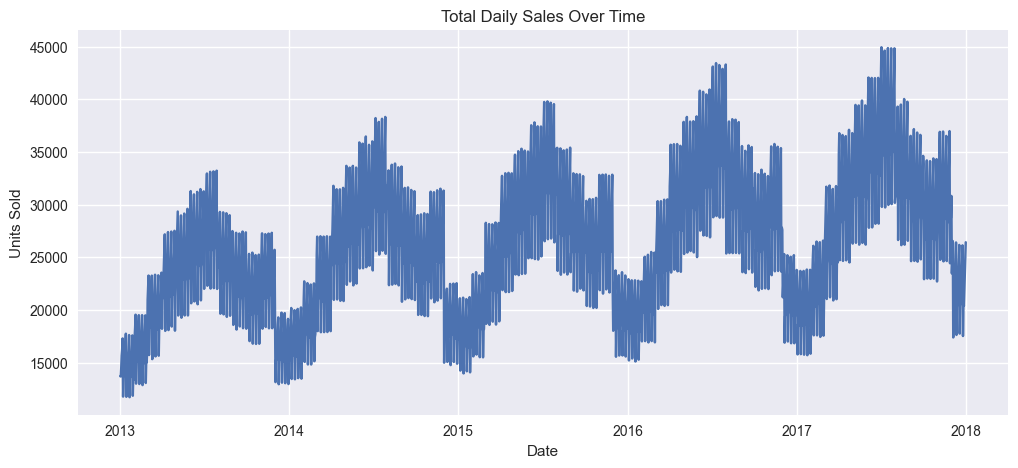

In [10]:
daily_sales = df.groupby("date")["sales"].sum()

plt.figure(figsize=(12,5))
plt.plot(daily_sales)
plt.title("Total Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.show()


### Temporal Demand Pattern Insight

- Clear seasonal spikes are visible
- Overall demand remains relatively stable over time
- Indicates strong temporal dependencies suitable for time-series modeling


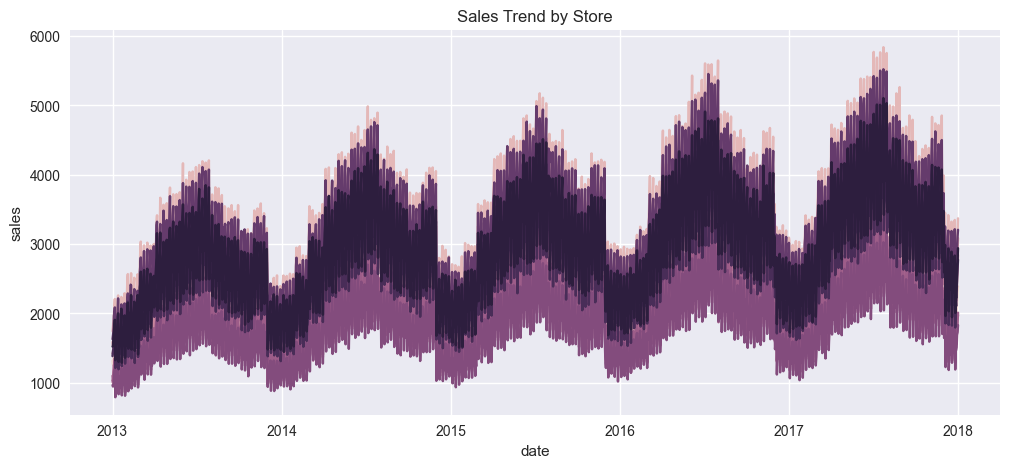

In [11]:
store_sales = (
    df.groupby(["date", "store"])["sales"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(12,5))
sns.lineplot(
    data=store_sales,
    x="date",
    y="sales",
    hue="store",
    legend=False
)
plt.title("Sales Trend by Store")
plt.show()


### Store-Level Insight

- Stores follow similar seasonal demand patterns
- Differences in magnitude indicate store-specific demand effects


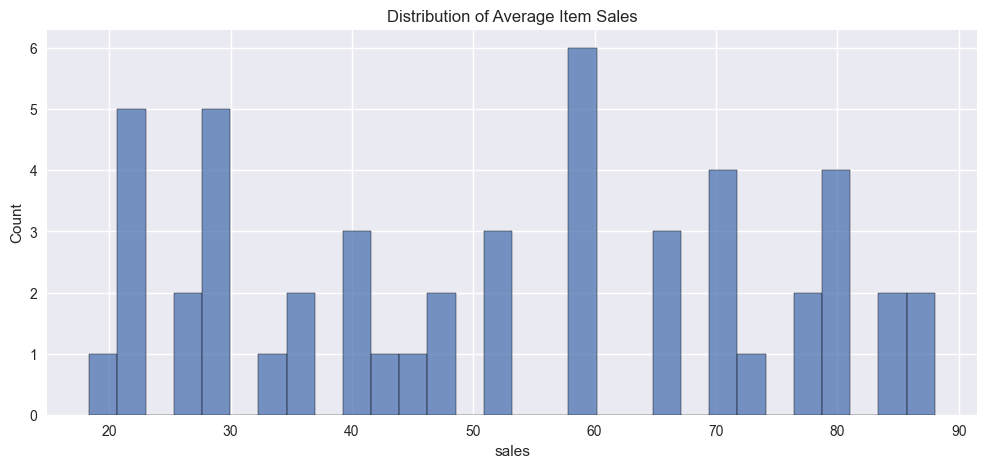

In [12]:
item_avg_sales = df.groupby("item")["sales"].mean()

plt.figure(figsize=(12,5))
sns.histplot(item_avg_sales, bins=30)
plt.title("Distribution of Average Item Sales")
plt.show()


### Item-Level Demand Insight

- Certain items consistently exhibit high demand
- Presence of long-tail behavior
- Forecasting difficulty varies across items


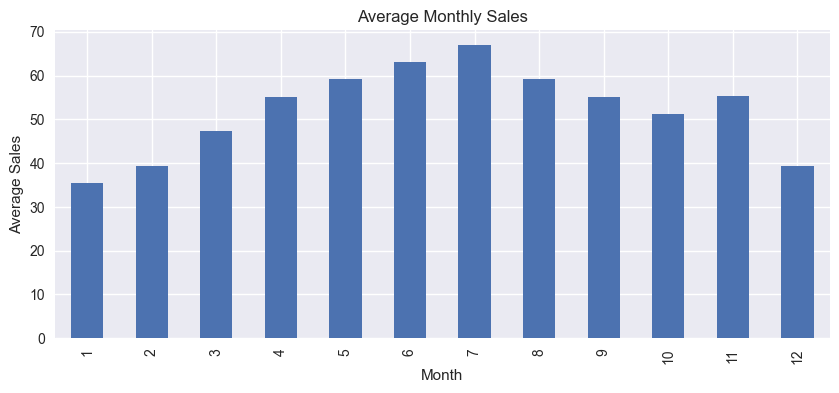

In [14]:
df["month"] = df["date"].dt.month
monthly_sales = df.groupby("month")["sales"].mean()

plt.figure(figsize=(10,4))
monthly_sales.plot(kind="bar")
plt.title("Average Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.show()


### Monthly Seasonality Insight

- Strong monthly seasonality is present
- Demand varies significantly across months
- Justifies creation of time-based features such as month and quarter


In [18]:
import os

FIGURE_DIR = "../reports/figures"
os.makedirs(FIGURE_DIR, exist_ok=True)


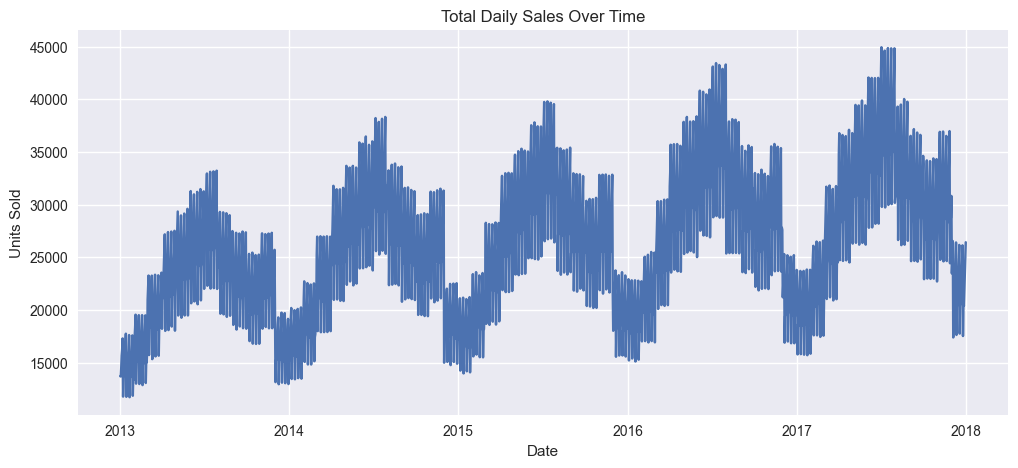

In [19]:
plt.figure(figsize=(12,5))
plt.plot(daily_sales)
plt.title("Total Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Units Sold")

plt.savefig(f"{FIGURE_DIR}/total_daily_sales.png", bbox_inches="tight")
plt.show()


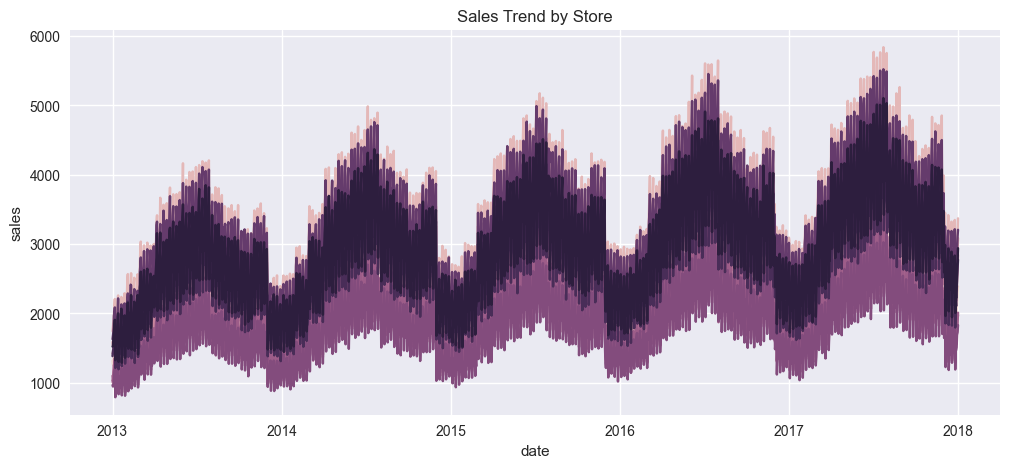

In [20]:
plt.figure(figsize=(12,5))
sns.lineplot(
    data=store_sales,
    x="date",
    y="sales",
    hue="store",
    legend=False
)
plt.title("Sales Trend by Store")

plt.savefig(f"{FIGURE_DIR}/store_level_trends.png", bbox_inches="tight")
plt.show()


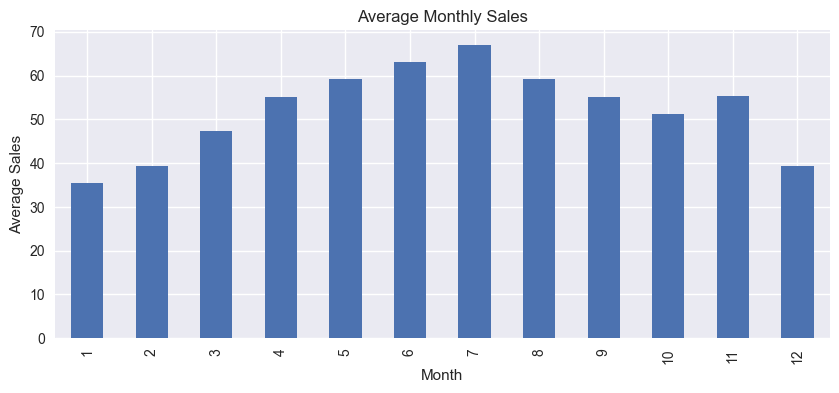

In [21]:
plt.figure(figsize=(10,4))
monthly_sales.plot(kind="bar")
plt.title("Average Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Average Sales")

plt.savefig(f"{FIGURE_DIR}/monthly_seasonality.png", bbox_inches="tight")
plt.show()


## Key EDA Conclusions

- Sales exhibit strong temporal dependencies with clear seasonality patterns
- Both store and item dimensions contribute systematic variance to demand
- Presence of long-tail item demand increases forecasting complexity
- Multi-year data span enables learning of long-term trends and seasonal effects
- Effective feature engineering will be critical for forecasting performance
